# Data Science Capstone Project 

# Exploring the Cities in Texas

## Introduction - Business Problem and Target Audience

Texas is one of the most diverse states in the US in term of both ethnic and economic diversity. This makes it a prospective location for restaurant business especially Thai cuisine that has captivated people all over the world with its aromatic ingredients, spicy taste and unique flavor. 

The following data analysis is conducted to explore the potential of opening a Thai restaurant in Texas. The analysis will be focused on the five most populous cities in Texas which are Houston, San Antonio, Dallas, Austin, and Fort Worth. 

Several factors will be taken into consideration such as demographic and economic information, people's interests, current competition and other common venues in the cities. 

Target audiences are potential investors who are looking to open or expand a restaurant as well as current restaurant customers who might want to explore the cities further for other restaurants. The analysis should also be beneficial for current and future data scientists who want to use exploratory data analysis, data visualization, and machine learning to find insights from the data and further answer other questions. 


## Data

**1. Geographical Coordinates of Each City: Geopy**

The latitude and longitude of each city were obtained using Geopy and were stored in a dataframe. 

**2. Demographic and Economic Information: Web Scraping**

Statistical information such as population, race, income and housing for each city was obtained from the United States Census Bureau website (https://www.census.gov/quickfacts/fact/table/US/PST045219)
The data tables were read from the website into a dataframe using pandas. The parameters of interest are %Asian, Median household income, and Median gross rent. 

**3. Restaurants Search and Venues Exploring: Foursquare location data**

Foursquare API was used to **search** for restaurants to study the competition as well as **explore** common venues in the city to study the interests of people. 
The calls returned JSON files from which relevant data could be extracted. The limit for search is 50 places while the limit for explore is 100 venues. The radius of interest is within 10 km. 


## Methodology

First, let's import all of the required libraries 

In [12]:
# Import libraries

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') #for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means for clustering
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Matplotlib version:  3.2.2
Libraries imported.


### 1. Import and Explore Data

#### 1.1 Geographical Coordinates

The focus of the analysis will be on the five most populous cities in Texas which are Houston, San Antonio, Dallas, Austin, and Fort Worth.

Since we are going to search and explore venues using the Foursquare API as well as plotting them on the map, we will first need the geographical coordinates of each city. 

The geographical coordinates of each city will be obtained using Geopy, which transforms the address into latitude and longitude values. 
Their latitude and longitude values are then stored in a dataframe. 

In [3]:
# Initialize a dataframe to store city list and their geographical coordinates

city_df=pd.DataFrame(columns=['City','Latitude','Longitude'])

# Select five most populous cities in Texas 

cities= ['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth']

# Find the latitude and longitude of each city using Geopy and store them in a dataframe

for i, city in enumerate(cities):

    geolocator = Nominatim(user_agent="tx_explorer")
    location = geolocator.geocode(city)
    latitude = location.latitude
    longitude = location.longitude
    city_df = city_df.append({'City': city, 'Latitude': latitude, 'Longitude':longitude}, ignore_index=True)

city_df

,City,Latitude,Longitude
0,Houston,29.758938,-95.367697
1,San Antonio,29.424600,-98.495141
2,Dallas,32.776272,-96.796856
3,Austin,30.271129,-97.743700
4,Fort Worth,32.753177,-97.332746


#### 1.2 Demographic and Economic Information

Next, we will obtain some demographic and economic information of each city from web scraping. 

The United States Census Bureau website (https://www.census.gov/quickfacts/fact/table/US/PST045219) provides statistical information such as population, race, income and housing information for each city. 

We will read the data tables from the website into a dataframe using pandas.

In [4]:
# Use pandas to read the data table from United States Census Bureau website into a pandas dataframe

census= pd.read_html("https://www.census.gov/quickfacts/fact/table/fortworthcitytexas,sanantoniocitytexas,austincitytexas,dallascitytexas,houstoncitytexas/PST045219")

pop = census[1]
pop.columns=['Population', 'Fort Worth', 'San Antonio', 'Austin', 'Dallas', 'Houston']
pop

,Population,Fort Worth,San Antonio,Austin,Dallas,Houston
0,"Population estimates, July 1, 2019, (V2019)",909585,1547253,978908,1343573,2320268
1,"Population estimates base, April 1, 2010, (V2019)",744824,1326161,801829,1197658,2095517
2,"Population, percent change - April 1, 2010 (es...",22.1%,16.7%,22.1%,12.2%,10.7%
3,"Population, Census, April 1, 2010",741206,1327407,790390,1197816,2099451
4,Age and Sex,NaN,NaN,NaN,NaN,NaN
5,"Persons under 5 years, percent", 8.0%, 6.9%, 6.4%, 7.5%, 7.6%
6,"Persons under 18 years, percent", 27.7%, 25.0%, 20.4%, 25.0%, 25.1%
7,"Persons 65 years and over, percent", 9.7%, 12.0%, 8.9%, 10.3%, 10.5%
8,"Female persons, percent", 51.0%, 50.6%, 49.2%, 50.6%, 50.1%
9,Race and Hispanic Origin,NaN,NaN,NaN,NaN,NaN


In order to evaluate the demand, affordability, and economic conditions of the upcoming restaurant, some parameters such as %Asian, Median household income, and Median gross rent were taken into consideration. 

These parameters were selected and assigned into a new dataframe. We will need to remove the special characters in the imported values as well as convert their data types into float and integer values for future plotting and analysis. 


In [5]:
# Select the parameters of interest which are %Asian, Median household income, and Median gross rent and assign them to a new dataframe. 
pop2=pop.iloc[[13,55,27], :]

# Transpose the dataframe and assign new column names 
pop2=pop2.T.reset_index()
pop2.columns=['City','% Asian','Median household income', 'Median gross rent']
pop2 = pop2.drop([0], axis=0)

# Remove special characters from the imported values 
pop2['Median household income']=pop2['Median household income'].str.replace('$', '')
pop2['Median household income']=pop2['Median household income'].str.replace(',', '')

pop2['Median gross rent']=pop2['Median gross rent'].str.replace('$', '')
pop2['Median gross rent']=pop2['Median gross rent'].str.replace(',', '')

pop2['% Asian']=pop2['% Asian'].str.replace('%', '')
pop2['% Asian']=pop2['% Asian'].str.replace('\ue840\ue83f ', '')

# Convert the data types into float and integer values 
pop2['% Asian']=pop2['% Asian'].astype(float)
pop2['Median household income']=pop2['Median household income'].astype('int64')
pop2['Median gross rent']=pop2['Median gross rent'].astype('int64')

print(pop2.dtypes)
pop2

City                        object
% Asian                    float64
Median household income      int64
Median gross rent            int64
dtype: object


,City,% Asian,Median household income,Median gross rent
1,Fort Worth,4.6,62187,1060
2,San Antonio,2.8,52455,992
3,Austin,7.6,71576,1280
4,Dallas,3.4,52580,1052
5,Houston,6.8,52338,1041


#### 1.3 Search Thai Restaurants

In order to study the restaurant business in the area, we should start from our direct competitors which are other Thai restaurants. 

We will use the Foursquare API to **Search Thai Restaurants** in each city. 

The Search keyword is 'Thai'. The call returns a JSON file from which we can extract the restaurants' names, coordinates and categories and store them in a new dataframe. 
The radius of interest is within 10 km and the search limit is 50 venues (less than explore limit which is 100 venues). 

In [7]:
# Use Foursquare API to search restaurants in the city

# Define Foursquare Credentials and Version

CLIENT_ID = '2330DP1FYFOGBPEEMZ21RQ1CGZWAZJQ0SONPRGQNDQG35EAB' # Foursquare ID
CLIENT_SECRET = 'W3ELHRGRI51A4YRWJP2ZQDYXOEWU42PC0ZMUB0TLVK055VTD' # Foursquare Secret
ACCESS_TOKEN = 'MYFQPQCIGBQIWPVUDUKKWTUTCO0B40OC1OMPQY5ENSL4FNGU' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 


# Create function to utilize Foursquare API to search Thai restaurants in each city

def SearchThai(names, latitudes, longitudes, search_query, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            ACCESS_TOKEN, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
    
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each venue
        
        for v in results:
                
            if len(v['categories']) == 0:
                Res_Cate='Not Assigned'
            else:
                Res_Cate=v['categories'][0]['name']
            
            venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        Res_Cate)])
            
            
    nearby_Restaurants = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_Restaurants.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Thai venues', 
                  'Thai venues Latitude', 
                  'Thai venues Longitude', 
                  'Thai venues Category']
    
    return(nearby_Restaurants)
 
# Run the above function on each city and create a new dataframe called Thai_venues.

Thai_venues = SearchThai(names=city_df['City'],
                                   latitudes=city_df['Latitude'],
                                   longitudes=city_df['Longitude'], 
                                   search_query = 'Thai'
                                  )


Thai_venues


,City,City Latitude,City Longitude,Thai venues,Thai venues Latitude,Thai venues Longitude,Thai venues Category
0,Houston,29.758938,-95.367697,Thai Spice Cafe,29.757305,-95.368824,Thai Restaurant
1,Houston,29.758938,-95.367697,Padthai Thai Restaurant,29.762710,-95.364304,Thai Restaurant
2,Houston,29.758938,-95.367697,Morningside Thai Restaurant,29.763182,-95.360310,Asian Restaurant
3,Houston,29.758938,-95.367697,Khun Kay Thai Café,29.755724,-95.392144,Thai Restaurant
4,Houston,29.758938,-95.367697,Time for Thai by Thai Cottage,29.757286,-95.365259,Thai Restaurant
...,...,...,...,...,...,...,...
171,Fort Worth,32.753177,-97.332746,Thai Nipa,32.809357,-97.277390,Thai Restaurant
172,Fort Worth,32.753177,-97.332746,Sikhay Thai Lao Restaurant & Boba Tea,32.795451,-97.299461,Thai Restaurant
173,Fort Worth,32.753177,-97.332746,Ocha Thai,32.824416,-97.238199,Thai Restaurant
174,Fort Worth,32.753177,-97.332746,Thailicious,32.732470,-97.388632,Thai Restaurant


Let's look at what venue categories were returned with the 'Thai' Search keyword.

In [8]:
Thai_venues['Thai venues Category'].value_counts()

Thai Restaurant                  105
Food Truck                        19
Massage Studio                    13
Asian Restaurant                   8
Food                               3
Doctor's Office                    3
Sushi Restaurant                   3
Athletics & Sports                 3
Not Assigned                       2
Medical Center                     1
Jewelry Store                      1
Office                             1
Church                             1
Government Building                1
Vegetarian / Vegan Restaurant      1
Bookstore                          1
Vietnamese Restaurant              1
Embassy / Consulate                1
Grocery Store                      1
Military Base                      1
Japanese Restaurant                1
Food Stand                         1
Spa                                1
Salon / Barbershop                 1
Martial Arts School                1
Costume Shop                       1
Name: Thai venues Category, dtype: int

Since the Search results also contain other venue categories such as offices and massage studios, we will narrow them down to only the venues with 'Restaurant' categories. 

In [9]:
Thai_Restaurants=Thai_venues[Thai_venues['Thai venues Category'].astype(str).str.contains('Restaurant')].reset_index()
Thai_Restaurants.drop('index',axis=1, inplace=True)
Thai_Restaurants

,City,City Latitude,City Longitude,Thai venues,Thai venues Latitude,Thai venues Longitude,Thai venues Category
0,Houston,29.758938,-95.367697,Thai Spice Cafe,29.757305,-95.368824,Thai Restaurant
1,Houston,29.758938,-95.367697,Padthai Thai Restaurant,29.762710,-95.364304,Thai Restaurant
2,Houston,29.758938,-95.367697,Morningside Thai Restaurant,29.763182,-95.360310,Asian Restaurant
3,Houston,29.758938,-95.367697,Khun Kay Thai Café,29.755724,-95.392144,Thai Restaurant
4,Houston,29.758938,-95.367697,Time for Thai by Thai Cottage,29.757286,-95.365259,Thai Restaurant
...,...,...,...,...,...,...,...
114,Fort Worth,32.753177,-97.332746,Thai Nipa,32.809357,-97.277390,Thai Restaurant
115,Fort Worth,32.753177,-97.332746,Sikhay Thai Lao Restaurant & Boba Tea,32.795451,-97.299461,Thai Restaurant
116,Fort Worth,32.753177,-97.332746,Ocha Thai,32.824416,-97.238199,Thai Restaurant
117,Fort Worth,32.753177,-97.332746,Thailicious,32.732470,-97.388632,Thai Restaurant


#### 1.4 Search All Restaurants

Other than Thai restaurants, we should also study other types of restaurants in the area to evaluate the market. 

We will use the Foursquare API to **Search All Restaurants** in each city. 

The Search keyword is 'restaurant'. The call returns a JSON file from which we can extract the restaurants' names, coordinates and categories and store them in a new dataframe. 
The radius of interest is within 10 km and the Search limit is 50 venues. 

Please also note that since the limit for Search is only 50 venues, not all the restaurants are captured in the results. We can obviously see that not as many Thai restaurants were returned compared to when we searched for Thai restaurants only. The same goes for other types of restaurants. 

In [6]:
# Create function to utilize Foursquare API to search restaurants in each city

def SearchVenues(names, latitudes, longitudes, search_query, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            ACCESS_TOKEN, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
    
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each venue
        
        for v in results:
                
            if len(v['categories']) == 0:
                Res_Cate='Not Assigned'
            else:
                Res_Cate=v['categories'][0]['name']
            
            venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        Res_Cate)])
            
            
    nearby_Restaurants = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_Restaurants.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Restaurants', 
                  'Restaurants Latitude', 
                  'Restaurants Longitude', 
                  'Restaurants Category']
    
    return(nearby_Restaurants)
 
# Run the above function on each city and create a new dataframe called Restaurants.

Restaurants = SearchVenues(names=city_df['City'],
                                   latitudes=city_df['Latitude'],
                                   longitudes=city_df['Longitude'], 
                                   search_query = 'restaurant'
                                  )


Restaurants


,City,City Latitude,City Longitude,Restaurants,Restaurants Latitude,Restaurants Longitude,Restaurants Category
0,Houston,29.758938,-95.367697,Spindletop Restaurant at Hyatt Regency Houston,29.756949,-95.369097,Seafood Restaurant
1,Houston,29.758938,-95.367697,Andalucia Tapas Restaurant and Bar,29.753929,-95.364056,Spanish Restaurant
2,Houston,29.758938,-95.367697,Mai's Restaurant,29.741242,-95.379769,Vietnamese Restaurant
3,Houston,29.758938,-95.367697,Harry's Restaurant,29.746533,-95.381130,Mediterranean Restaurant
4,Houston,29.758938,-95.367697,Kim Son Restaurant - Downtown,29.745905,-95.360474,Vietnamese Restaurant
...,...,...,...,...,...,...,...
245,Fort Worth,32.753177,-97.332746,Byblos Lebanese Restaurant,32.778344,-97.346975,Mediterranean Restaurant
246,Fort Worth,32.753177,-97.332746,Lazo's Mexican Restaurant,32.788998,-97.350807,Mexican Restaurant
247,Fort Worth,32.753177,-97.332746,Joe's Italian Restaurant,32.725487,-97.344242,Pizza Place
248,Fort Worth,32.753177,-97.332746,El Puerto Mexican Restaurant 2,32.713669,-97.331223,Mexican Restaurant


Since the Search results also contain other food places such as bars and hotels, we will narrow them down to only the venues with 'Restaurant' categories. 

In [10]:
TX_Restaurants=Restaurants[Restaurants['Restaurants Category'].astype(str).str.contains('Restaurant')].reset_index()
TX_Restaurants.drop('index',axis=1, inplace=True)
TX_Restaurants

,City,City Latitude,City Longitude,Restaurants,Restaurants Latitude,Restaurants Longitude,Restaurants Category
0,Houston,29.758938,-95.367697,Spindletop Restaurant at Hyatt Regency Houston,29.756949,-95.369097,Seafood Restaurant
1,Houston,29.758938,-95.367697,Andalucia Tapas Restaurant and Bar,29.753929,-95.364056,Spanish Restaurant
2,Houston,29.758938,-95.367697,Mai's Restaurant,29.741242,-95.379769,Vietnamese Restaurant
3,Houston,29.758938,-95.367697,Harry's Restaurant,29.746533,-95.381130,Mediterranean Restaurant
4,Houston,29.758938,-95.367697,Kim Son Restaurant - Downtown,29.745905,-95.360474,Vietnamese Restaurant
...,...,...,...,...,...,...,...
163,Fort Worth,32.753177,-97.332746,Hole In The Wall Mexican Restaurant,32.786438,-97.313384,Mexican Restaurant
164,Fort Worth,32.753177,-97.332746,Byblos Lebanese Restaurant,32.778344,-97.346975,Mediterranean Restaurant
165,Fort Worth,32.753177,-97.332746,Lazo's Mexican Restaurant,32.788998,-97.350807,Mexican Restaurant
166,Fort Worth,32.753177,-97.332746,El Puerto Mexican Restaurant 2,32.713669,-97.331223,Mexican Restaurant


#### 1.5 Explore the city

We should expand our analysis beyond the restaurant business and also study the popular spots in the city as well. 
This should help us learn the locals' interests and potentially use them to improve our strategy and marketing plan in the future. 

We will use the Foursquare API to **Explore** each city. The radius of interest is within 10 km and the limit for explore is 100 venues. 

In [11]:
# Create function to utilize Foursquare API to explore the city

def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Run the above function on each city and create a new dataframe called City_venues.

City_venues = getNearbyVenues(names=city_df['City'],
                                   latitudes=city_df['Latitude'],
                                   longitudes=city_df['Longitude']
                                  )


City_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Houston,29.758938,-95.367697,Hobby Center for the Performing Arts,29.761526,-95.369376,Performing Arts Venue
1,Houston,29.758938,-95.367697,Alley Theatre,29.761671,-95.365313,Theater
2,Houston,29.758938,-95.367697,Wortham Theater Center,29.763353,-95.365663,Theater
3,Houston,29.758938,-95.367697,Conservatory,29.760427,-95.361570,Beer Garden
4,Houston,29.758938,-95.367697,House of Blues,29.753822,-95.363953,Music Venue
...,...,...,...,...,...,...,...
495,Fort Worth,32.753177,-97.332746,Dutch's Hamburgers,32.707313,-97.360190,Burger Joint
496,Fort Worth,32.753177,-97.332746,Thailicious,32.732470,-97.388632,Thai Restaurant
497,Fort Worth,32.753177,-97.332746,Kincaid's Hamburgers,32.737577,-97.393340,Burger Joint
498,Fort Worth,32.753177,-97.332746,Fuzzy's Taco Shop,32.705957,-97.359132,Mexican Restaurant


### 2. Analyze and Visualize Data

Since we are planning to open a Thai restaurant, our target group of customers will primarily be Asians and Americans with Asian descent. 

Thus, we will start by visualizing the **percentage of Asian population in each city** using pyplot. 

The bar chart showing % Asian in each city sorted from largest to smallest is shown below. 

We can see that Austin consists of the highest percentage of Asian population at 7.6% and San Antonio has the lowest % Asian at 2.8%. 

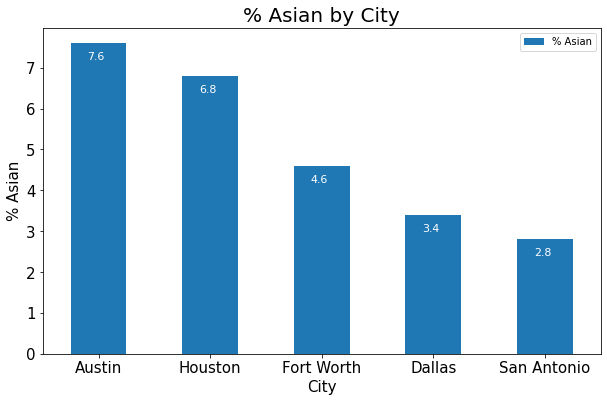

In [14]:
Asian_df=City_merged[['City','% Asian']].sort_values(['% Asian'], ascending=False, axis=0)

Asian_df.set_index('City').plot(kind='bar', figsize=(10, 6))

plt.xlabel('City', size=15) # add x-label to the plot
plt.ylabel('% Asian', size=15) # add y-label to the plot

plt.title('% Asian by City', size=20) # add title to the plot

plt.xticks(size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Asian_df['% Asian']): 
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(index - 0.1, value - 0.4), color='white', size=11)

plt.show()

In order to evaluate the economic condition of the city and affordability of the restaurant, we should also look at the median household income. 

The bar chart below shows the **Median household income for each city**. It is ranked from the city with highest value to lowest one. 

As displayed in the chart, Austin has the highest median household income at \\$71,576 while Houston has the lowest median household income at \\$52,338. 

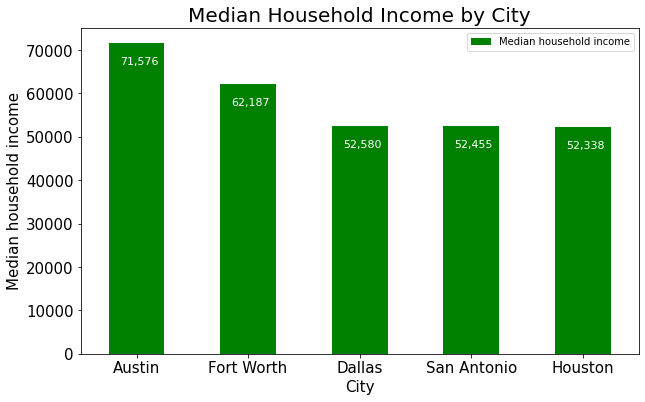

In [94]:
Income_df=City_merged[['City','Median household income']].sort_values(['Median household income'], ascending=False, axis=0)

Income_df.set_index('City').plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('City', size=15) # add x-label to the plot
plt.ylabel('Median household income', size=15) # add y-label to the plot

plt.title('Median Household Income by City', size=20) # add title to the plot

plt.xticks(size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Income_df['Median household income']): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(index - 0.15, value - 5000), color='white', size=11)

plt.show()


The third parameter that we would like to compare is the Median Gross rent. The actual amount for restaurant lease will vary but the trend should still hold for cost comparison between cities. The higher the amount will result in the higher fixed costs for opereating the restaurant in the future. 

The bar chart showing the **Median gross rent for each city** is displayed below. It is also ranked from the city with highest to lowest value. 

We can see that Austin has the highest median gross rent while San Antonio has the lowest one. 

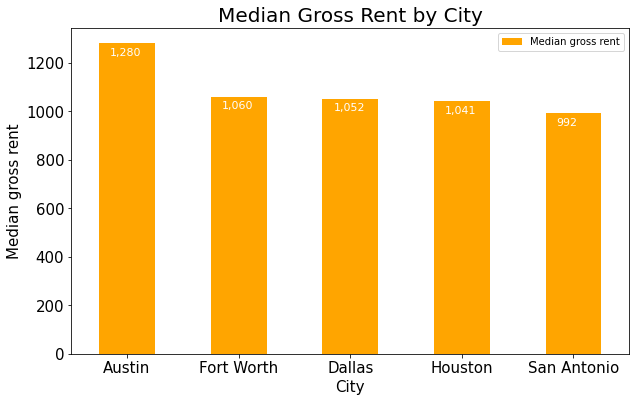

In [96]:
Rent_df=City_merged[['City','Median gross rent']].sort_values(['Median gross rent'], ascending=False, axis=0)

Rent_df.set_index('City').plot(kind='bar', figsize=(10, 6), color='orange')

plt.xlabel('City', size=15) # add x-label to the plot
plt.ylabel('Median gross rent', size=15) # add y-label to the plot

plt.title('Median Gross Rent by City', size=20) # add title to the plot

plt.xticks(size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Rent_df['Median gross rent']): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(index - 0.15, value - 50), color='white', size=11)

plt.show()

In order to study the current competition in each city, we will first look at our direct competitors which are other Thai restaurants. 

According to the **Search for Thai restaurants** using Foursquare API, the number of Thai restaurants in each city can be plotted for comparison. 

The bar chart below shows the **Count of Thai restaurants in each city**, ranked from largest to smallest number. As mentioned before, the radius for Search is within 10 km. 

We can observe that the highest competition is in Austin and Houston with 28 Thai restaurants within 10 km radius, while the lowest competition is in Fort Worth with only 16 Thai restaurants. 

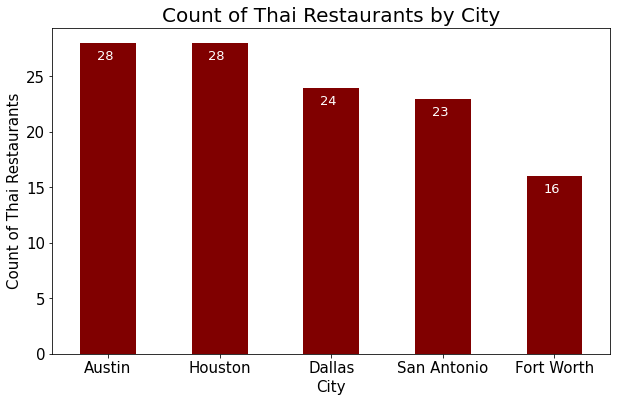

In [35]:
Thai_group=Thai_Restaurants['City'].value_counts().sort_values(ascending=False)

Thai_group.plot(kind='bar', figsize=(10, 6), color='maroon')

plt.xlabel('City', size=15) # add x-label to the plot
plt.ylabel('Count of Thai Restaurants', size=15) # add y-label to the plot

plt.title('Count of Thai Restaurants by City', size=20) # add title to the plot

plt.xticks(size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Thai_group): 
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=(index - 0.1, value - 1.5), color='white', size=13)

plt.show()

We can also **visualize the Thai restaurants** from the Foursquare API Search results in **Folium map**. 

The initial zoom is for Texas as a whole with all the Thai restaurants from the Search shown in different colors according to the city 

We can zoom in to look at the location of Thai restaurants in each city and click on the markers to display the name and city of the restaurants. 

In [66]:
# Visualize the Thai restaurants in Texas using Folium map

address = 'Texas'

geolocator = Nominatim(user_agent="texas_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Texas are {}, {}.'.format(latitude, longitude))

# Create map
map_thaires = folium.Map(location=[latitude, longitude], zoom_start=6)

# Set color scheme for each city
colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# Add markers to the map
for lat, lon, poi, city in zip(Thai_Restaurants['Thai venues Latitude'], Thai_Restaurants['Thai venues Longitude'], Thai_Restaurants['Thai venues'], Thai_Restaurants['City']):
    label = folium.Popup(str(poi) + ' , ' + str(city), parse_html=True)
    
    # Assign color index for each city 
    if city=='Houston':
        color_index=0
    elif city=='Dallas':
        color_index=1
    elif city=='Austin':
        color_index=2
    elif city=='San Antonio':
        color_index=3
    elif city=='Fort Worth':
        color_index=4
        
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[color_index],
        fill=True,
        fill_color=rainbow[color_index],
        fill_opacity=0.7).add_to(map_thaires)
       
map_thaires

The geograpical coordinate of Texas are 31.8160381, -99.5120986.


As mentioned previously, we also did another **Search for All Restaurants** in each city using Foursquare API to evaluate the restaurant business beyond just the Thai restaurants, we will also study other types of restaurants in the area. 

The **Search for All Restaurants** in each city using Foursquare API return different types of restaurant that can be used to 

According to the results from the to Search .

Other than Thai restaurants, we should also study other types of restaurants in the area to evaluate the market.

The Search keyword is 'restaurant'. The call returns a JSON file from which we can extract the restaurants' names, coordinates and categories and store them in a new dataframe. The radius of interest is within 10 km and the Search limit is 50 venues.

Please also note that since the limit for Search is only 50 venues, not all the restaurants are captured in the results. We can obviously see that not as many Thai restaurants were returned compared to when we searched for Thai restaurants only. The same goes for other types of restaurants.

There are 33 restaurants according to Foursquare API search


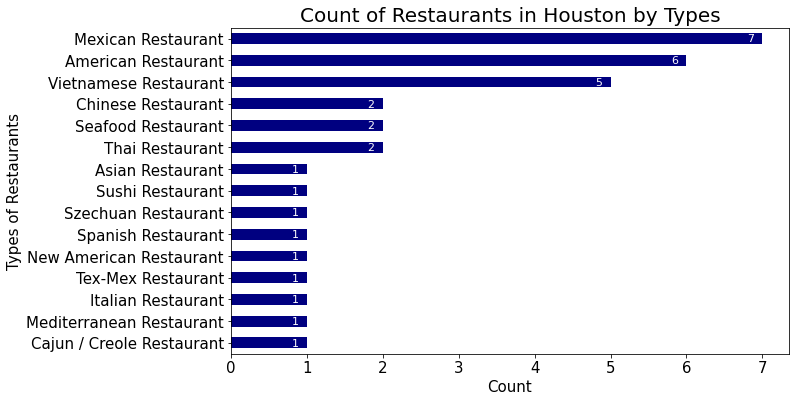

In [26]:
# Filter to only the restaurants in Houston

Hou_res=TX_Restaurants[TX_Restaurants['City']=='Houston']
print("There are", Hou_res.shape[0], "restaurants according to Foursquare API search")

Hou_resgroup=Hou_res['Restaurants Category'].value_counts().sort_values(ascending=True)

#Create a horizontal bar plot that shows the count of restaurants in Houston by Type

Hou_resgroup.plot(kind='barh', figsize=(10, 6), color='navy')

plt.xlabel('Count', size=15) # add x-label to the plot
plt.ylabel('Types of Restaurants', size=15) # add y-label to the plot

plt.title('Count of Restaurants in Houston by Types', size=20) # add title to the plot

plt.xticks(range(max(Hou_resgroup+1)), size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Hou_resgroup): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.2, index - 0.15), color='white', size=11)

plt.show()


There are 29 restaurants according to Foursquare API search


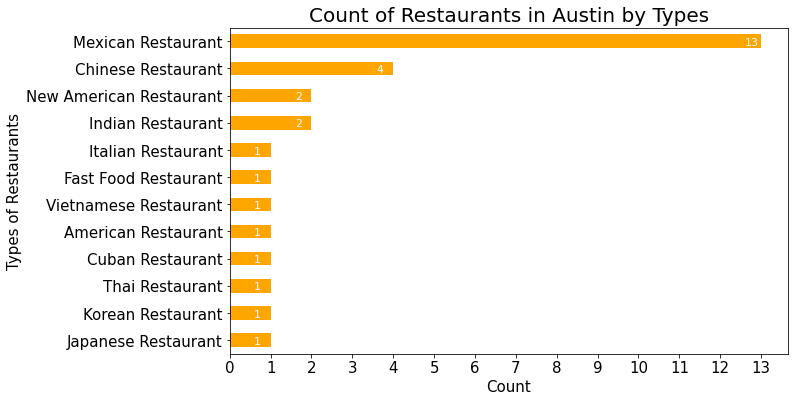

In [27]:
# Filter to only the restaurants in Austin

Aus_res=TX_Restaurants[TX_Restaurants['City']=='Austin']

# Drop the restaurants that have unspecified restaurant type
Aus_res=Aus_res[Aus_res['Restaurants Category']!='Restaurant']

print("There are", Aus_res.shape[0], "restaurants according to Foursquare API search")

Aus_resgroup=Aus_res['Restaurants Category'].value_counts().sort_values(ascending=True)

#Create a horizontal bar plot that shows the count of restaurants in Austin by Type

Aus_resgroup.plot(kind='barh', figsize=(10, 6), color='orange')

plt.xlabel('Count', size=15) # add x-label to the plot
plt.ylabel('Types of Restaurants', size=15) # add y-label to the plot

plt.title('Count of Restaurants in Austin by Types', size=20) # add title to the plot

plt.xticks(range(max(Aus_resgroup+1)), size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Aus_resgroup): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.4, index - 0.15), color='white', size=11)

plt.show()

There are 26 restaurants according to Foursquare API search


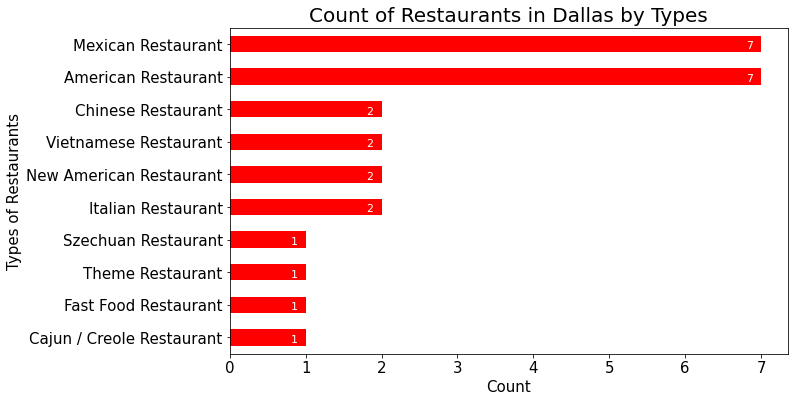

In [28]:
# Filter to only the restaurants in Dallas

Dal_res=TX_Restaurants[TX_Restaurants['City']=='Dallas']

# Drop the restaurants that have unspecified restaurant type
Dal_res=Dal_res[Dal_res['Restaurants Category']!='Restaurant']

print("There are", Dal_res.shape[0], "restaurants according to Foursquare API search")

Dal_resgroup=Dal_res['Restaurants Category'].value_counts().sort_values(ascending=True)

#Create a horizontal bar plot that shows the count of restaurants in Dallas by Type

Dal_resgroup.plot(kind='barh', figsize=(10, 6), color='red')

plt.xlabel('Count', size=15) # add x-label to the plot
plt.ylabel('Types of Restaurants', size=15) # add y-label to the plot

plt.title('Count of Restaurants in Dallas by Types', size=20) # add title to the plot

plt.xticks(range(max(Dal_resgroup+1)), size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(Dal_resgroup): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.2, index - 0.15), color='white', size=11)

plt.show()

There are 35 restaurants according to Foursquare API search


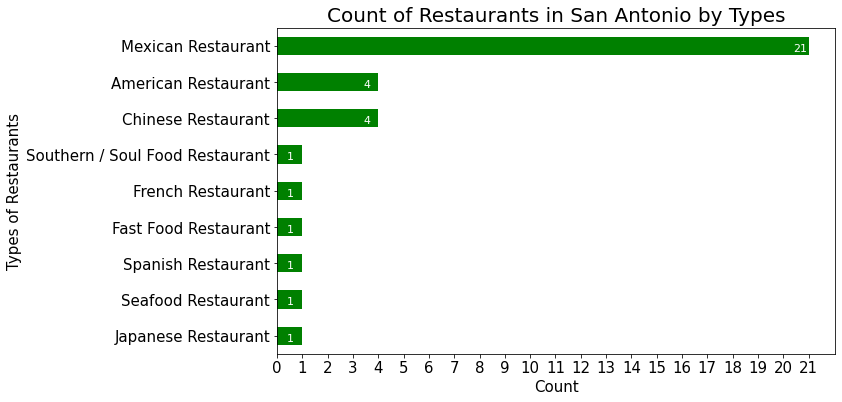

In [29]:
# Filter to only the restaurants in San Antonio

San_res=TX_Restaurants[TX_Restaurants['City']=='San Antonio']

# Drop the restaurants that have unspecified restaurant type
San_res=San_res[San_res['Restaurants Category']!='Restaurant']

print("There are", San_res.shape[0], "restaurants according to Foursquare API search")

San_resgroup=San_res['Restaurants Category'].value_counts().sort_values(ascending=True)

#Create a horizontal bar plot that shows the count of restaurants in San Antonio by Type

San_resgroup.plot(kind='barh', figsize=(10, 6), color='green')

plt.xlabel('Count', size=15) # add x-label to the plot
plt.ylabel('Types of Restaurants', size=15) # add y-label to the plot

plt.title('Count of Restaurants in San Antonio by Types', size=20) # add title to the plot

plt.xticks(range(max(San_resgroup+1)), size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(San_resgroup): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.6, index - 0.15), color='white', size=11)

plt.show()

There are 31 restaurants according to Foursquare API search


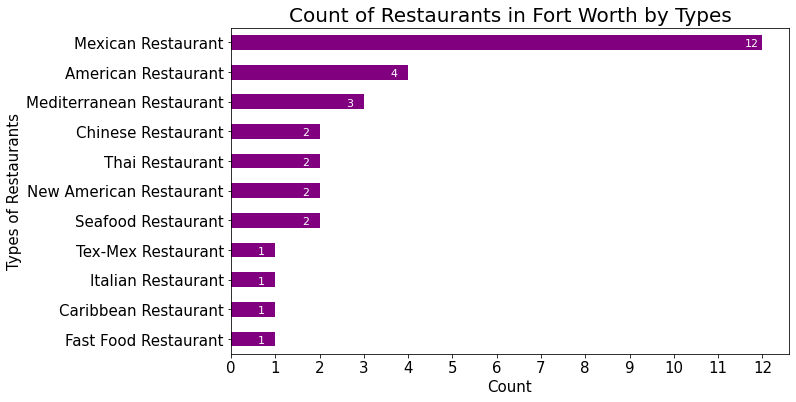

In [30]:
# Filter to only the restaurants in Fort Worth

For_res=TX_Restaurants[TX_Restaurants['City']=='Fort Worth']

# Drop the restaurants that have unspecified restaurant type
For_res=For_res[For_res['Restaurants Category']!='Restaurant']

print("There are", For_res.shape[0], "restaurants according to Foursquare API search")

For_resgroup=For_res['Restaurants Category'].value_counts().sort_values(ascending=True)

#Create a horizontal bar plot that shows the count of restaurants in Fort Worth by Type

For_resgroup.plot(kind='barh', figsize=(10, 6), color='purple')

plt.xlabel('Count', size=15) # add x-label to the plot
plt.ylabel('Types of Restaurants', size=15) # add y-label to the plot

plt.title('Count of Restaurants in Fort Worth by Types', size=20) # add title to the plot

plt.xticks(range(max(For_resgroup+1)), size=15, rotation='horizontal')
plt.yticks(size=15)

# annotate value labels to each city
for index, value in enumerate(For_resgroup): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.4, index - 0.15), color='white', size=11)

plt.show()

In [5]:
# Analyze common venues in each city

# one hot encoding
City_onehot = pd.get_dummies(City_venues[['Venue Category']], prefix="", prefix_sep="")

# A venue category named 'Neighborhood' needs to be renamed so neighborhood column can be added later
#Toronto_onehot.rename(columns={'Neighborhood': 'Neighborhood type'}, inplace=True)

# Add city column back to dataframe
City_onehot['City'] = City_venues['City'] 

# Move city column to the first column
fixed_columns = [City_onehot.columns[-1]] + list(City_onehot.columns[:-1])
City_onehot = City_onehot[fixed_columns]

# Fixed_columns
print(City_onehot.shape)
City_onehot.head()

(500, 130)


,City,American Restaurant,Antique Shop,Art Gallery,Art Museum,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,...,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,Houston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Houston,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Houston,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Houston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Houston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Group rows by city and by taking the mean of the frequency of occurrence of each category

City_grouped = City_onehot.groupby('City').mean().reset_index()

print(City_grouped.shape)
City_grouped

(5, 130)


,City,American Restaurant,Antique Shop,Art Gallery,Art Museum,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,...,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,Austin,0.04,0.00,0.00,0.01,0.03,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.03,0.00
1,Dallas,0.03,0.01,0.00,0.02,0.01,0.00,0.00,0.04,0.00,...,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.01,0.00
2,Fort Worth,0.03,0.00,0.00,0.03,0.02,0.00,0.01,0.03,0.00,...,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01
3,Houston,0.03,0.00,0.00,0.01,0.01,0.01,0.01,0.03,0.01,...,0.00,0.02,0.00,0.00,0.03,0.00,0.04,0.03,0.01,0.00
4,San Antonio,0.04,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.00,...,0.00,0.03,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00


In [7]:
# Create a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Create a new dataframe and display the top 10 venues for each city.
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['City'] = City_grouped['City']


for ind in np.arange(City_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(City_grouped.iloc[ind, :], num_top_venues)

City_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austin,Hotel,Coffee Shop,Ice Cream Shop,Pizza Place,Park,American Restaurant,Seafood Restaurant,Food Truck,BBQ Joint,Yoga Studio
1,Dallas,Coffee Shop,Hotel,Burger Joint,Bar,Brewery,Park,Steakhouse,Mexican Restaurant,American Restaurant,New American Restaurant
2,Fort Worth,Mexican Restaurant,Brewery,Seafood Restaurant,Burger Joint,Coffee Shop,Ice Cream Shop,Hotel,Art Museum,Bar,Beer Bar
3,Houston,Coffee Shop,Brewery,Beer Garden,Vietnamese Restaurant,Park,Mexican Restaurant,Café,Pizza Place,Grocery Store,Gym
4,San Antonio,Hotel,Beer Garden,Plaza,Ice Cream Shop,Mexican Restaurant,American Restaurant,New American Restaurant,Theater,Lounge,Burger Joint


In [73]:
# Merge Toronto venues data with Toronto coordinates data to add latitude/longitude for each neighborhood
City_merged = City_venues_sorted.join(pop2.set_index('City'), on='City')
City_merged

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,% Asian,Median household income,Median gross rent
0,Austin,Hotel,Coffee Shop,Ice Cream Shop,Pizza Place,Park,American Restaurant,Seafood Restaurant,Food Truck,BBQ Joint,Yoga Studio,7.6,71576,1280
1,Dallas,Coffee Shop,Hotel,Burger Joint,Bar,Brewery,Park,Steakhouse,Mexican Restaurant,American Restaurant,New American Restaurant,3.4,52580,1052
2,Fort Worth,Mexican Restaurant,Brewery,Seafood Restaurant,Burger Joint,Coffee Shop,Ice Cream Shop,Hotel,Art Museum,Bar,Beer Bar,4.6,62187,1060
3,Houston,Coffee Shop,Brewery,Beer Garden,Vietnamese Restaurant,Park,Mexican Restaurant,Café,Pizza Place,Grocery Store,Gym,6.8,52338,1041
4,San Antonio,Hotel,Beer Garden,Plaza,Ice Cream Shop,Mexican Restaurant,American Restaurant,New American Restaurant,Theater,Lounge,Burger Joint,2.8,52455,992


### 3. Cluster the Data 

In [59]:
# CLuster the cities
# Run k-means to cluster the cities into 3 clusters.

# Set number of clusters
kclusters = 3

City_grouped_clustering = City_grouped.drop('City', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(City_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])


[1 1 2 2 0]


In [74]:
# Add clustering label column to the dataframe
City_merged.insert(1, 'Cluster Labels', kmeans.labels_)


# Merge venues data with city coordinates data to add latitude/longitude for each city
City_merged = City_merged.join(city_df.set_index('City'), on='City')

City_merged

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,% Asian,Median household income,Median gross rent,Latitude,Longitude
0,Austin,1,Hotel,Coffee Shop,Ice Cream Shop,Pizza Place,Park,American Restaurant,Seafood Restaurant,Food Truck,BBQ Joint,Yoga Studio,7.6,71576,1280,30.271129,-97.743700
1,Dallas,1,Coffee Shop,Hotel,Burger Joint,Bar,Brewery,Park,Steakhouse,Mexican Restaurant,American Restaurant,New American Restaurant,3.4,52580,1052,32.776272,-96.796856
2,Fort Worth,2,Mexican Restaurant,Brewery,Seafood Restaurant,Burger Joint,Coffee Shop,Ice Cream Shop,Hotel,Art Museum,Bar,Beer Bar,4.6,62187,1060,32.753177,-97.332746
3,Houston,2,Coffee Shop,Brewery,Beer Garden,Vietnamese Restaurant,Park,Mexican Restaurant,Café,Pizza Place,Grocery Store,Gym,6.8,52338,1041,29.758938,-95.367697
4,San Antonio,0,Hotel,Beer Garden,Plaza,Ice Cream Shop,Mexican Restaurant,American Restaurant,New American Restaurant,Theater,Lounge,Burger Joint,2.8,52455,992,29.424600,-98.495141


In [75]:
# Visualize the resulting clusters

address = 'Texas'

geolocator = Nominatim(user_agent="texas_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(City_merged['Latitude'], City_merged['Longitude'], City_merged['City'], City_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Toronto are 31.8160381, -99.5120986.


## Discussion

## Conclusion

In [ ]:
#Limitation : Max 50 restaurants per search so not capturing all competitors
#Incorporate cafe/ice cream to restaurant

#Size the circle based on ?value

#report
#notebook
#presentation 
